In [ ]:
# 라이브러리 설치
!pip install opencv-python mediapipe

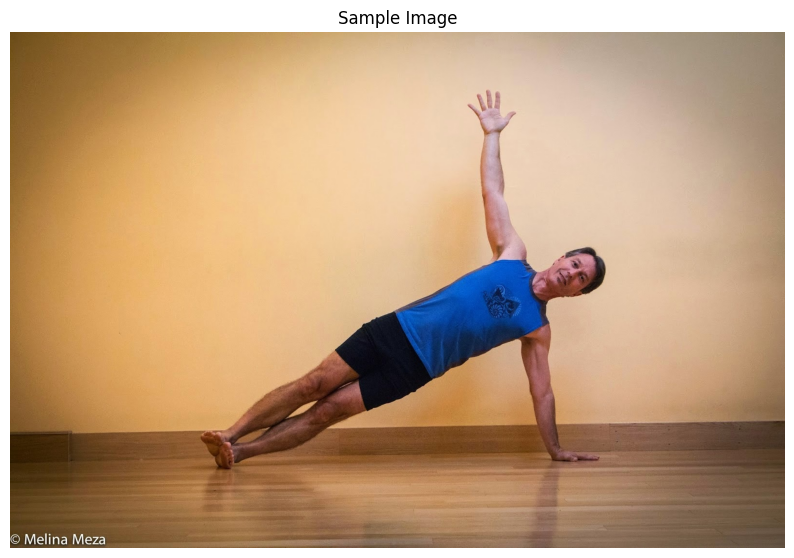

NOSE:
x: 0.7220797538757324
y: 0.47166645526885986
z: -0.16713041067123413
visibility: 0.9999865293502808

LEFT_EYE_INNER:
x: 0.7334722280502319
y: 0.47407275438308716
z: -0.14532692730426788
visibility: 0.9999222755432129

NOSE:
x: 1155.3276062011719
y: 502.7964413166046
z: -267.4086570739746
visibility: 0.9999865293502808

LEFT_EYE_INNER:
x: 1173.555564880371
y: 505.3615561723709
z: -232.5230836868286
visibility: 0.9999222755432129



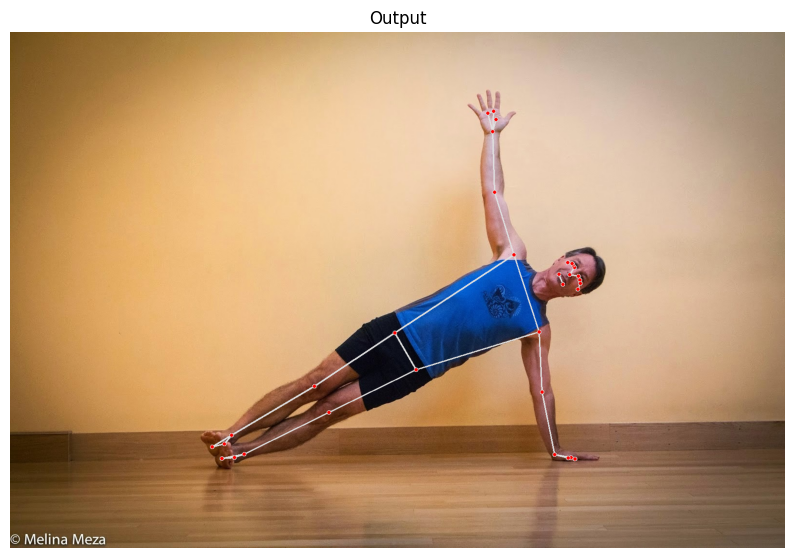

In [59]:
# 라이브러리 설정
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

# Initializing mediapipe pose class.
# mediapipe pose class를 초기화 한다.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
# pose detect function에 image detect=True, 최소감지신뢰도 = 0.3, 모델 복잡도 =2를 준다.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
# mediapipe의 drawing class를 초기화한다.
mp_drawing = mp.solutions.drawing_utils

# 이미지 읽어오기
# 샘플 이미지를 cv2.imread()로 읽어온다
# Read an image from the specified path.
sample_img = cv2.imread('/content/yoga1.jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display.
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

# pose detect 수행
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterate two times as we only want to display first two landmark.
    for i in range(2):

        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

# 랜드마크를 그릴 사진을 COPY한다.
img_copy = sample_img.copy()

# 랜드마크를 찾는다.
if results.pose_landmarks:

    # sample image에 landmark를 그린다.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

    # figure의 크기를 설정한다.
    fig = plt.figure(figsize = [10, 10])

    # landmark가 draw된 image를 보여주기 전에 BGR TO RGB를 위해 copy_image의 순서를 반대로 변형해준다.
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()




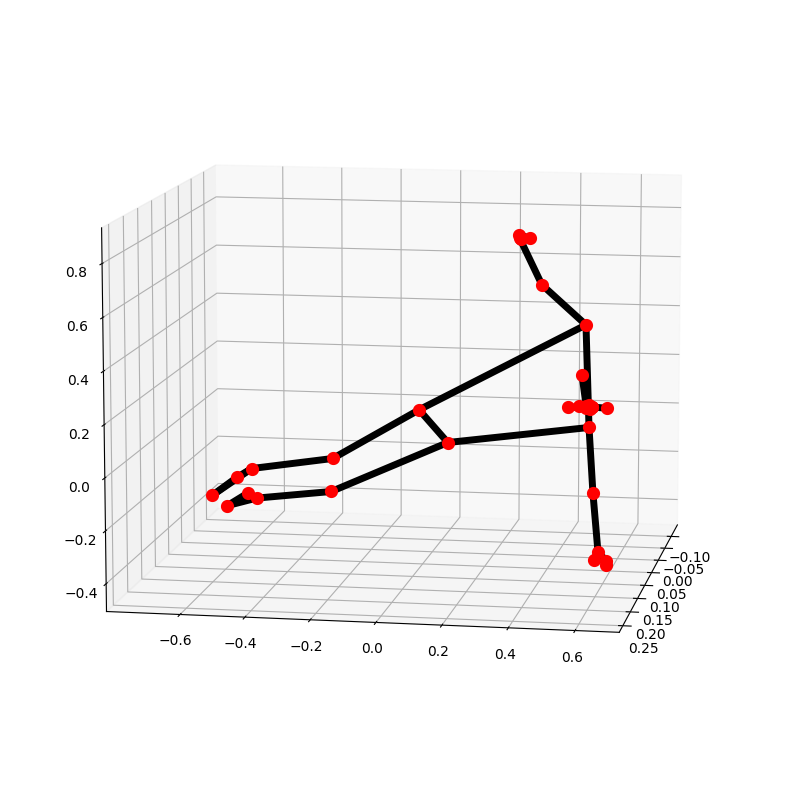

In [60]:
# 3차원으로 pose의 landmark의 위치를 확인
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [62]:
import pandas as pd

# 랜드마크 데이터와 자세 이름을 DataFrame으로 변환하는 함수
def landmarks_to_df(landmarks, image_width, image_height, pose_name):
    data = []
    for i, landmark in enumerate(landmarks.landmark):
        row = {
            'landmark_id': i,
            'x': landmark.x * image_width,
            'y': landmark.y * image_height,
            'z': landmark.z * image_width,
            'visibility': landmark.visibility,
            'pose_name': pose_name  # 자세 이름을 라벨로 추가
        }
        data.append(row)
    return pd.DataFrame(data)

# 예를 들어, 결과를 처리하는 코드 부분에서
if results.pose_landmarks:
    # 여기서 'Warrior_Pose'는 예시입니다. 실제 자세 이름으로 교체해야 합니다.
    df_landmarks = landmarks_to_df(results.pose_landmarks, image_width, image_height, 'Warrior_Pose')

    # DataFrame을 CSV 파일로 저장
    df_landmarks.to_csv('compare2.csv', index=False)
